<div style="background-color:#009440; padding: 0px; background-size:cover; background-opacity:50%; border-radius:5px; height: 300px">
    <div style="margin: 5px; padding: 10px;"><h1 style="color:#00000">Geophysical Data Acquisition and Analysis</h1>
    <h4 style="color:#dddddd">LMU, 2 May 2016</h4>
        <h4 style="color:#dddddd">Ceri Nunn</h4>
    </div>
    <div style="float:right; margin: 10px; padding: 20px; background:rgba(255,255,255,0.7); width: 70%; height: 150px">
        <div style="position:relative; top:30%; transform: translateY(-50%)">
            <div style="font-size: x-large; font-weight:900; color:rgba(0,0,0,0.8); line-height:100%">P03 - Observables and Instrumentation</div>
                    </div>
    </div>
</div>

The first question should be attempted by everyone. 

Different groups will answer the other questions.

For this exercise we will use some GPS data from the Tohoku-Oki earthquake.

## Question 1 (all groups should attempt this)

Let's first check that you have the correct packages installed. Run the following:

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


If you get an error message, and if you are on a Mac, try this command (from a terminal window):

conda install basemap

We think basemap isn't working yet for Windows. Please join another group if it doesn't work for you. 

The following piece of code uses basemap. Try running it, and then read through the options. 

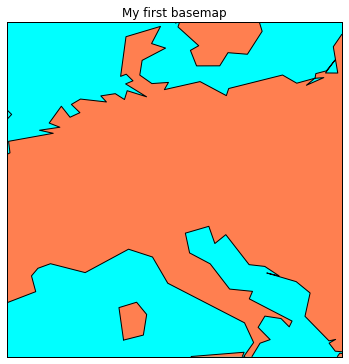

In [1]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# Set the size of the figure
plt.figure(figsize=(12,6))
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='cyl',llcrnrlat=38,urcrnrlat=58,resolution='c',
            llcrnrlon=1.5,urcrnrlon=21.5)
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
plt.title("My first basemap")
plt.show()

Plot a map of Japan, with a Mercator projection, latitude from 30-46, longitude from 128-146. 
Fill continents and map boundary is not required. 

Title should be '"ARIA Post and Co-seismic Displacements from Mw 9.0 Sendai-Oki Earthquake"'.

Read the documentation for Basemap to familiarise yourself with the options. 

http://http://matplotlib.org/basemap/api/basemap_api.html

Experiment with the resolution option. 

The following code reads in the 2 data files and displays them for you (this may be useful later, but you do not need to do anything here): 

In [14]:
# There are two data files

# print the first 10 lines  
f = open('Data/ARIA_coseismic_offsets.v0.3.table', 'r')
for i, line in enumerate(f):
    print(repr(line))
    if i > 8:
        break
        
print('')
        
# print the first 10 lines  
f = open('Data/ARIA_postseismic_offsets.v0.3.table', 'r')
for i, line in enumerate(f):
    print(repr(line))
    if i > 8:
        break

'# Preliminary GPS coseismic displacement data (version 0.3) for March 11, 2011 M9 Japanese earthquake\n'
'# Provided by the ARIA team at JPL and Caltech.\n'
'# All Original GEONET RINEX data provided to Caltech by the Geospatial Information Authority (GSI) of Japan.\n'
'# Calculated by ARIA team, created March 12, 2011 using Rapid Orbits\n'
'# Displacements are difference between solution  at 5:40 and 5:55 UTC, based on 5 min solutions\n'
'# Columns are LON LAT East(m) North(m) Vert(m) Sigma(m) Site\n'
'# For questions, contact ARIA team at aria@jpl.nasa.gov or aria@caltech.edu\n'
'141.7504354065  45.40299236571  -0.0136  -0.0028  -0.0285  0.0296278585118803  0001  \n'
'140.3187360875  38.75859512330  1.4768  -0.5085  -0.002  0.03055519595748  0033  \n'
'136.8511277683  34.46538724953  0.0274  0.0045  -0.0166  0.0314006369362152  0065  \n'

'# Preliminary GPS early postseismic displacement data (version 0.3) for March 11, 2011 M9 Japanese earthquake\n'
'# Provided by the ARIA team at 

The following code reads in the data file for the coseismic data and plots it on the map. 

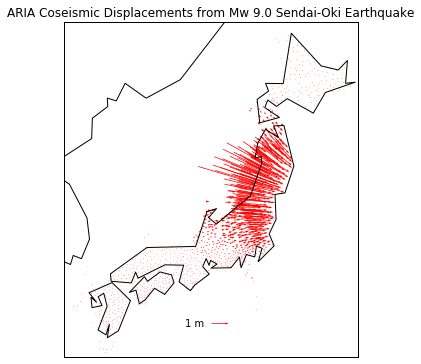

In [15]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# Preliminary GPS early postseismic displacement data (version 0.3) for March 11, 2011 M9 Japanese earthquake
# Provided by the ARIA team at JPL and Caltech.
# All Original GEONET RINEX data provided to Caltech by the Geospatial Information Authority (GSI) of Japan.
# Calculated by ARIA team, created March 12, 2011 using Rapid Orbits
# Displacements are difference between solution  at 5:55 and 14:00 UTC, based on 5 min solutions

# Set the size of the figure
plt.figure(figsize=(12,6))

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'l' means use low resolution coastlines.
# resolution = 'c' means crude resolution
m = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=46,resolution='c',
            llcrnrlon=128,urcrnrlon=146)
m.drawcoastlines()
plt.title("ARIA Coseismic Displacements from Mw 9.0 Sendai-Oki Earthquake")

a_lon = []
a_lat = []
a_east = []
a_north = []

# read in the coseismic data
f = open('Data/ARIA_coseismic_offsets.v0.3.table', 'r')
# skip the first SEVEN lines 
for _ in range(7):
    next(f)
for line in f:
#     split the line and read into the variables 
    lon, lat, east, north, vert, sigma, site, _ =  line.split('  ')
    a_lon.append(lon)
    a_lat.append(lat)
    a_east.append(east)
    a_north.append(north)

# make numpy arrays from the data     
a_lon = np.array(a_lon,dtype='float32')
a_lat = np.array(a_lat,dtype='float32')
a_east = np.array(a_east,dtype='float32')
a_north = np.array(a_north,dtype='float32')

# transform the latitude and longitude to the correct projection with 
# basemap 
x,y=m(a_lon,a_lat)

# plot vectors  
Q = m.quiver(x,y,a_east,a_north,color='r',pivot='tip')
qk = plt.quiverkey(Q, 0.5, 0.1, 1, '1 m', labelpos='W')

plt.show()

In the code above, change the following: 
    Use the tail of the GPS vector, rather than the tip (the way it is currently plotted implies that a lot of the GPS devices are offshore)
    Increase the coastline resolution. 
    
You may find the documentation useful:    
    http://matplotlib.org/mpl_toolkits/mplot3d/api.html
    
    

The following code reads in both the coseismic and the 
postseismic displacement and plots it on a map.

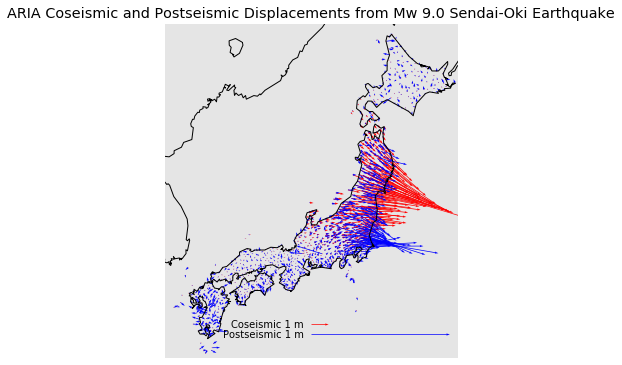

In [94]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# Preliminary GPS early postseismic displacement data (version 0.3) for March 11, 2011 M9 Japanese earthquake
# Provided by the ARIA team at JPL and Caltech.
# All Original GEONET RINEX data provided to Caltech by the Geospatial Information Authority (GSI) of Japan.
# Calculated by ARIA team, created March 12, 2011 using Rapid Orbits
# Displacements are difference between solution  at 5:55 and 14:00 UTC, based on 5 min solutions

# Set the size of the figure
plt.figure(figsize=(12,6))

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'l' means use low resolution coastlines.
# resolution = 'c' means crude resolution
m = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=46,resolution='l',
            llcrnrlon=128,urcrnrlon=146)
m.drawcoastlines()
plt.title("ARIA Coseismic Displacements from Mw 9.0 Sendai-Oki Earthquake")

a_lon = []
a_lat = []
a_east = []
a_north = []

f = open('Data/ARIA_coseismic_offsets.v0.3.table', 'r')
# skip the first SEVEN lines 
for _ in range(7):
    next(f)
for line in f:
#     split the line and read into the variables 
    lon, lat, east, north, vert, sigma, site, _ =  line.split('  ')
    a_lon.append(lon)
    a_lat.append(lat)
    a_east.append(east)
    a_north.append(north)

# make numpy arrays from the data     
a_lon = np.array(a_lon,dtype='float32')
a_lat = np.array(a_lat,dtype='float32')
a_east = np.array(a_east,dtype='float32')
a_north = np.array(a_north,dtype='float32')

# transform the latitude and longitude to the correct projection with 
# basemap 
x,y=m(a_lon,a_lat)

# And then plot vectors  
Q = m.quiver(x,y,a_east,a_north,color='r',pivot='tail')
qk = plt.quiverkey(Q, 0.5, 0.1, 1, 'Coseismic 1 m', labelpos='W')

# repeat for postseismic displacement 

plt.title("ARIA Coseismic and Postseismic Displacements from Mw 9.0 Sendai-Oki Earthquake")

a_lon = []
a_lat = []
a_east = []
a_north = []

f = open('Data/ARIA_postseismic_offsets.v0.3.table', 'r')
# skip the first SIX lines 
for _ in range(6):
    next(f)
for line in f:
#     split the line and read into the variables 
    lon, lat, east, north, vert, sigma, site, _ =  line.split('  ')
    a_lon.append(lon)
    a_lat.append(lat)
    a_east.append(east)
    a_north.append(north)

# make numpy arrays from the data     
a_lon = np.array(a_lon,dtype='float32')
a_lat = np.array(a_lat,dtype='float32')
a_east = np.array(a_east,dtype='float32')
a_north = np.array(a_north,dtype='float32')

# transform the latitude and longitude to the correct projection with 
# basemap 
x,y=m(a_lon,a_lat)

# And then plot vectors  
Q = m.quiver(x,y,a_east,a_north,color='b',pivot='tail')
qk = plt.quiverkey(Q, 0.5, 0.07, 1, 'Postseismic 1 m', labelpos='W')

plt.show()

## Questions

The GPS data are calculated relative to North America. 

1) Which way did the fault move?

2) Is the post seismic movement generally in the same direction as the coseismic?

3) Estimate the maximum coseismic slip and the maximum postseismic slip.

4) Can you estimate the earthquake hypocenter.

## Option 1

Get all the mainshock and the aftershocks from IRIS. Add to our basemap plot.

Hints: 

Include all the code so far to plot the basemap.

Use the code from week 1 to find the events. 

Loop through the event origins  in the catalog. Make a list from origin.latitude and origin.longitude.

Transform to the basemap projection - this will look something like this: 

    x,y=m(longitudes,latitudes)

Plot on the basemap with m.scatter().


## Option 2

View the focal mechanisms for the mainshock and the aftershocks (use a website). 
Also find out how far the fault is thought to have moved.


## Option 3 

Read in the data and find the maximum GPS displacement for the coseismic movement. 

Hint: Use the code which reads in the table as a starting point. And the built-in python method max() which was explained in week 1. You will need to loop through the data. You may also find the python function zip() useful. 

Also find out how far the fault is thought to have moved (using a literature search).

Can you explain the difference bewteen the GPS movement and the fault movement. 

## Option 4 

The following is an image of the GPS field across the Himalaya, the Tibetan Plateau and China. It is plotted relative to stable Eurasia. It is reproduced from Gan 2007, 'Present-day crustal motion within the Tibetan Plateau inferred from GPS measurements'.

<img src="Data/Gan_gps_velocity_field.jpg">

The longest vectors are just to the south of the Himalaya. These respresent the motion of India - approximately 4 cm/yr, NNE.

1) Where is the greatest displacement? Which direction is the motion? Describe the difference between the motion to the south of the Himalaya, 
with that immediately north of the mountain front. 

2) Look at the south-east corner of the box. What is happening? 

3) Sketch (very roughly) the GPS field from the perspective of an observer on the Indian subcontinent.